# Maze generation experiments

This notebook is dedicated to attempts to balance algorithm of procedural generation of maze for the game "The Labyrinth". The rules for the map to take into consideration:
- Maze should be of size N x N, (N is variable)
- Between every two cells there could be a wall, however the maze should always be connected, every cell of the maze should be accesssible from every other cell of the maze
- Maze should have few isolated "rooms" with only 1 or 2 holes: "hospital", "armory", "bear's lair" (optional)
  - "armory" and "hospital" should have a square of from 3 to 5 cells
  - "bear's lair" should be of size 2 cells with 1 hole only (also should be optional for generation)
- in the outer wall there should be exactly 1 hole
- at the end we should have an algorithm to randomly distribute "things" across the map (such as: people and items) with certain limitations:
  - treasure shouldn't be too close to the outer wall hole
  - people shouldn't be too close to the outer wall hole and from the treasure, also, if possible, equally far from each other. Final goal here that it should be evenly "difficult" for every person to complete the maze
  - other items should be equally distributed across entire maze
  
---
### Optional rules to experiment with for bigger maps:
- River generation
- Portals generation

## Theory

We would approach this problem by decomposing it into 3:

1. **Base map generation:** Firstly, we will be generating base maze ensuring maze's connectivity with all sorts of algorithms, choosing the one that creates the most interesting mazes to play (First ones that I want to try out would be Randomized Prim's Algorithm, Randomized Kruskal's Algorithm and Recursive Division)
2. **Areas generation:** Secondly, we will be choosing in the maze some candidates for our areas ("armory", "hospital" and "bear's lair") and then with use of flood-fill algorithm would modify existing maze's walls, not breaking the maze's connectivity
3. **Fair distribution algorithm:** Lastly, we would be fairly distributing items and people across the algorithm, applying special rules

## Useful Resources
- Incredible website with a lot of maze generation algorithms: https://weblog.jamisbuck.org/2011/2/7/maze-generation-algorithm-recap.html

## Base map generation

### Log:

**7th April:**
- As I researched deeper the randomized maze generation algorithms, all of them appear to generate quite dense mazes
- Probably going to experiment with all the graphs listed in https://weblog.jamisbuck.org/2011/2/7/maze-generation-algorithm-recap.html
  - [ ] recursive backtracker
  - [ ] Eller’s algorithm
  - [ ] Kruskal’s algorithm
  - [ ] Prim’s algorithm
  - [ ] recursive division algorithm
  - [ ] Aldous-Broder algorithm
  - [ ] Wilson’s algorithm
  - [ ] Hunt-and-Kill algorithm
  - [ ] Growing Tree algorithm
  - [ ] Binary Tree algorithm
  - [ ] Sidewinder algorithm
  - [ ] Any other algorithms that I come up along the way (ugh it's so many of them, good luck, future version of me)
- And for each of them reduce the number of walls to some portion (customizable) of all possible ones
  - according to the mazes that we build ourselves, the portion of walls compared to all possible walls should be around 22% (40 out of 180)

In [1]:
# Imports
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Common parts
# ------------

# constants for passage directions
# Note: this may be deleted later after speed optimization, but for now, at the experimentation phase I think it's fine
N, S, E, W = 1, 2, 4, 8
DX = { E: 1, W: -1, N:  0, S: 0 }
DY = { E: 0, W:  0, N: -1, S: 1 }
OPPOSITE = { E: W, W: E, N: S, S: N }

# method to draw a maze from grid
def draw_maze(grid):
    fig, ax = plt.subplots(figsize=(10, 10))
    nrows, ncols = grid.shape
    
    ax.set_xlim(0, ncols)
    ax.set_ylim(0, nrows)
    ax.set_aspect('equal')
    
    for y in range(nrows):
        for x in range(ncols):
            if grid[y, x] & N:
                ax.plot([x, x+1], [nrows-y, nrows-y], color="black",linewidth=3)
            if grid[y, x] & S:
                ax.plot([x, x+1], [nrows-y-1, nrows-y-1], color="black", linewidth=3)
            if grid[y, x] & W:
                ax.plot([x, x], [nrows-y-1, nrows-y], color="black", linewidth=3)
            if grid[y, x] & E:
                ax.plot([x+1, x+1], [nrows-y-1, nrows-y], color="black", linewidth=3)
            
    plt.axis('off')
    plt.show()

### Recursive backtracker

In [3]:
def generate_maze_by_recursive_backtracker(maze_size: int):
    grid = np.zeros([maze_size, maze_size], dtype=int) # representing walls as bitfields
    def carve_passages_from(cx, cy, grid):
        directions = [N, S, E, W]
        random.shuffle(directions)
        for direction in directions:
            nx, ny = cx + DX[direction], cy + DY[direction]
            if ny >= 0 and ny < maze_size and nx >= 0 and nx < maze_size and grid[ny][nx] == 0:
                grid[cy][cx] |= direction
                grid[ny][nx] |= OPPOSITE[direction]
                carve_passages_from(nx, ny, grid)
        
    carve_passages_from(0, 0, grid)
    grid = N+S+E+W-grid # we actually need an inversion of that
    return grid

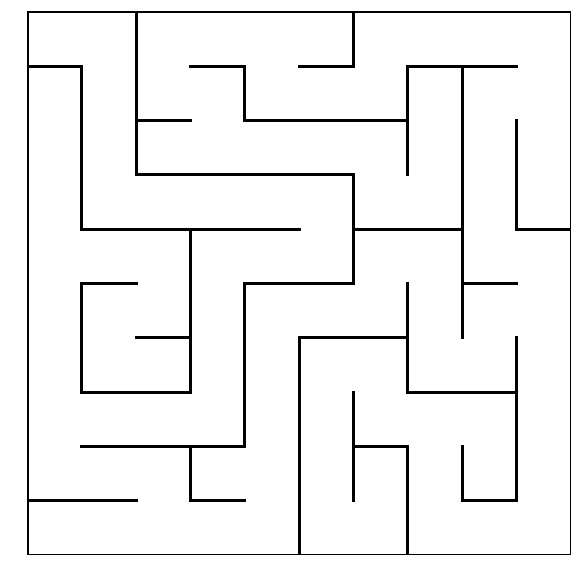

In [4]:
draw_maze(generate_maze_by_recursive_backtracker(10))